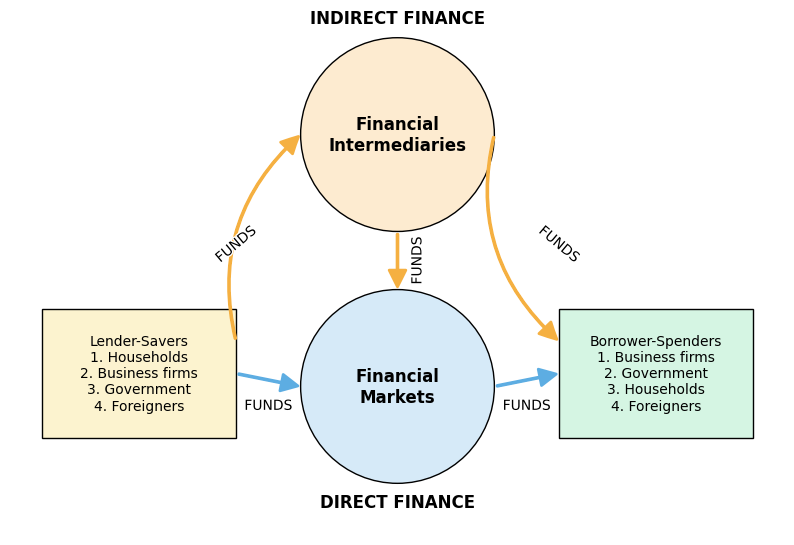

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, FancyArrowPatch, ArrowStyle
import matplotlib.patheffects as path_effects

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_aspect('equal')
ax.axis('off')

# Color variables (tweak as needed)
color_direct_arrows = '#5DADE2'       # Blue
color_indirect_arrows = '#F5B041'     # Orange
color_markets_circle = '#D6EAF8'      # Light blue
color_intermediaries_circle = '#FDEBD0'  # Light orange
color_lenders_box = '#FCF3CF'         # Pale yellow
color_borrowers_box = '#D5F5E3'       # Pale green

# Circle positions & sizes
fi_center = (5, 6.2)
fi_radius = 1.5
fm_center = (5, 2.3)
fm_radius = 1.5

# Box positions
ls_center = (1, 2.5)
bs_center = (9, 2.5)
box_width, box_height = 3, 2

# Financial Intermediaries (top circle)
fi_circle = Circle(fi_center, fi_radius, facecolor=color_intermediaries_circle, edgecolor='black', lw=1)
ax.add_patch(fi_circle)
ax.text(fi_center[0], fi_center[1],
        "Financial\nIntermediaries",
        ha='center', va='center', fontsize=12, fontweight='bold')

# Financial Markets (bottom circle)
fm_circle = Circle(fm_center, fm_radius, facecolor=color_markets_circle, edgecolor='black', lw=1)
ax.add_patch(fm_circle)
ax.text(fm_center[0], fm_center[1],
        "Financial\nMarkets",
        ha='center', va='center', fontsize=12, fontweight='bold')

# Lender-Savers box
ls_rect = Rectangle((ls_center[0] - box_width/2, ls_center[1] - box_height/2),
                    box_width, box_height,
                    facecolor=color_lenders_box, edgecolor='black', lw=1)
ax.add_patch(ls_rect)
ax.text(ls_center[0], ls_center[1],
        "Lender-Savers\n1. Households\n2. Business firms\n3. Government\n4. Foreigners",
        ha='center', va='center', fontsize=10)

# Borrower-Spenders box
bs_rect = Rectangle((bs_center[0] - box_width/2, bs_center[1] - box_height/2),
                    box_width, box_height,
                    facecolor=color_borrowers_box, edgecolor='black', lw=1)
ax.add_patch(bs_rect)
ax.text(bs_center[0], bs_center[1],
        "Borrower-Spenders\n1. Business firms\n2. Government\n3. Households\n4. Foreigners",
        ha='center', va='center', fontsize=10)

# Arrow style
arrow_style = ArrowStyle("Simple", tail_width=0.6, head_width=12, head_length=12)

# DIRECT FINANCE (blue, bottom)
# Lender-Savers -> Financial Markets
arrow_direct_1 = FancyArrowPatch(
    (ls_center[0] + box_width/2, ls_center[1]),
    (fm_center[0] - fm_radius, fm_center[1]),
    connectionstyle="arc3,rad=0",
    arrowstyle=arrow_style,
    color=color_direct_arrows, lw=2
)
ax.add_patch(arrow_direct_1)
ax.text(3, 2.0, "FUNDS", ha='center', va='center', fontsize=10,
        path_effects=[path_effects.withStroke(linewidth=2, foreground='white')])

# Financial Markets -> Borrower-Spenders
arrow_direct_2 = FancyArrowPatch(
    (fm_center[0] + fm_radius, fm_center[1]),
    (bs_center[0] - box_width/2, bs_center[1]),
    connectionstyle="arc3,rad=0",
    arrowstyle=arrow_style,
    color=color_direct_arrows, lw=2
)
ax.add_patch(arrow_direct_2)
ax.text(7, 2.0, "FUNDS", ha='center', va='center', fontsize=10,
        path_effects=[path_effects.withStroke(linewidth=2, foreground='white')])

# INDIRECT FINANCE (orange, top)
# Lender-Savers -> Financial Intermediaries
arrow_indirect_1 = FancyArrowPatch(
    (ls_center[0] + box_width/2, ls_center[1] + 0.5),
    (fi_center[0] - fi_radius, fi_center[1]),
    connectionstyle="arc3,rad=-0.3",
    arrowstyle=arrow_style,
    color=color_indirect_arrows, lw=2
)
ax.add_patch(arrow_indirect_1)
ax.text(2.5, 4.5, "FUNDS", ha='center', va='center', fontsize=10, rotation=40,
        path_effects=[path_effects.withStroke(linewidth=2, foreground='white')])

# Financial Intermediaries -> Borrower-Spenders
arrow_indirect_2 = FancyArrowPatch(
    (fi_center[0] + fi_radius, fi_center[1]),
    (bs_center[0] - box_width/2, bs_center[1] + 0.5),
    connectionstyle="arc3,rad=0.3",
    arrowstyle=arrow_style,
    color=color_indirect_arrows, lw=2
)
ax.add_patch(arrow_indirect_2)
ax.text(7.5, 4.5, "FUNDS", ha='center', va='center', fontsize=10, rotation=-40,
        path_effects=[path_effects.withStroke(linewidth=2, foreground='white')])

# Vertical arrow: Financial Intermediaries -> Financial Markets
arrow_vertical = FancyArrowPatch(
    (fi_center[0], fi_center[1] - fi_radius),
    (fm_center[0], fm_center[1] + fm_radius),
    connectionstyle="arc3,rad=0",
    arrowstyle=arrow_style,
    color=color_indirect_arrows, lw=2
)
ax.add_patch(arrow_vertical)
ax.text(fi_center[0] + 0.2, (fi_center[1] + fm_center[1]) / 2, "FUNDS",
        ha='left', va='center', fontsize=10, rotation=90,
        path_effects=[path_effects.withStroke(linewidth=2, foreground='white')])

# Titles
ax.text(5, 8, "INDIRECT FINANCE", ha='center', va='center', fontsize=12, fontweight='bold')
ax.text(5, 0.5, "DIRECT FINANCE", ha='center', va='center', fontsize=12, fontweight='bold')

# Plot limits
ax.set_xlim(-1, 11)
ax.set_ylim(0, 8)

plt.show()